# Active dataset ETL

Librerie varie da installare

In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

Inclusione delle librerie utilizzate

In [2]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Variabili di gestione files

In [3]:
# Path of the file, can be changed
PATH_ACTIVE = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset\Attive_rielaborate_G"

# True = export summary file in the OUTPUT_PATH
to_export = False

# Path of the desired output file, can be changed
OUTPUT_PATH = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_filtrato"

Leggo, per esempio, i file .csv contenuti in una directory e le sue sottodirectories (ACTIVE)

In [4]:
# Massive amount of columns needed to compute different financial estimators
to_keep_columns = ['Ragione sociale',
                   'Province',
                   'Number of employees',
                   'Accounting closing date',
                   'Legal Form',
                   'Legal Status ',
                   'Total financial charges',
                   "TOTAL SHAREHOLDERS' FUNDS",
                   'TOTAL CURRENT ASSETS',
                   'OPERATING MARGIN',
                   "Total depreciation, amortization and writedowns",
                   'Provisions fo risks and charges',
                   'Other provisions',
                   'Tax payable',
                   'Tax payable beyond 12 months',
                   'Due to social security institutions',
                   'Due to social security institutions - beyond 12 months',
                   'TOTAL FIXED ASSETS\n',
                   'PROFIT (LOSS) GROUP',
                   'Trade accounts',
                   'Trade accounts - beyond 12 months',
                   'Due to suppliers',
                   'Due to suppliers - beyond 12 ',
                   'TOTAL INVENTORIES',
                   'Due to banks',
                   'Due to banks - beyond 12 months',
                   'Due to other lenders',
                   'Due to other lenders - beyond 12 months',
                   'Bonds',
                   'Bonds beyond 12 months',
                   'Due to shar. for loans',
                   'Due to sharesholders for loans - beyond 12 months',
                   'TOTAL LIQUID FUNDS',
                   'Revenues from sales and services',
                   'TOTAL PAYABLES',
                   'Total payables during period',
                   'Total payables after period',
                   'Total asset',
                   "TOTAL LIABILITIES AND SHAREHOLDERS' FUNDS",
                   'Raw, consum. mat. and goods for resale',
                   'Services']

# Dataset with all the csv files
input_dataset = pd.DataFrame()

# Path of each csv file
# Path descrption: Attive_rielaborate_G/2015|2016|2017/*.csv
csv_files = glob.glob(os.path.join(PATH_ACTIVE, "**/*.csv"), recursive=True)

# Loop over the list of csv files
for f in csv_files:

    # Print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])

    # Read each csv file
    partial_dataset = pd.read_csv(f, sep=";", dtype=object, thousands=",", decimal=".", usecols=to_keep_columns)

    # Append the partial dataset
    input_dataset = pd.concat([input_dataset, partial_dataset])




print("Dimensione dataset delle società in attivo: ", input_dataset.shape)

Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset\Attive_rielaborate_G\2015\Copia di Aida_Export_100001_150000_GG.csv
File Name: Copia di Aida_Export_100001_150000_GG.csv
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset\Attive_rielaborate_G\2015\Copia di Aida_Export_150001_200000_GG.csv
File Name: Copia di Aida_Export_150001_200000_GG.csv
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset\Attive_rielaborate_G\2015\Copia di Aida_Export_200001_250000_GG.csv
File Name: Copia di Aida_Export_200001_250000_GG.csv
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset\Attive_rielaborate_G\2015\Copia di Aida_Export_250001_300000_GG.csv
File Name: Copia di Aida_Export_250001_300000_GG.csv
Location: C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset\Attive_rielaborate_G\2015\Copia di Aida_Export_300001_350000_GG.csv
File Name: Copia d

Rinomino colonne con typo vari

In [5]:
columns_map = {"TOTAL FIXED ASSETS\n": "TOTAL FIXED ASSETS",
               "Legal Status ": "Legal Status",
               "TOTAL SHAREHOLDERS' FUNDS": "TOTAL SHAREHOLDERS FUNDS",
               "TOTAL LIABILITIES AND SHAREHOLDERS' FUNDS": "TOTAL LIABILITIES AND SHAREHOLDERS FUNDS",
               "Due to suppliers - beyond 12 ": "Due to suppliers - beyond 12 months",
               "Due to shar. for loans": "Due to shareholders for loans"
               }
input_dataset.rename(columns=columns_map, inplace=True)

Tutti i valori non disponibili sono rimpiazzati con NaN

In [6]:
input_dataset.replace(to_replace="n.a.", value=np.NaN, inplace=True)
input_dataset.replace(to_replace="n.d.", value=np.NaN, inplace=True)
input_dataset.replace(to_replace="#VALUE!", value=np.NaN, inplace=True)
input_dataset.replace(to_replace="UDATACHI", value=np.NaN, inplace=True)
input_dataset.isna().sum()

Ragione sociale                                            199686
Province                                                   199863
Accounting closing date                                    199688
Number of employees                                        245399
Legal Form                                                 199950
Legal Status                                               199686
TOTAL FIXED ASSETS                                         201291
TOTAL CURRENT ASSETS                                       201291
TOTAL INVENTORIES                                          201291
Trade accounts                                            1060645
Trade accounts - beyond 12 months                          364935
TOTAL LIQUID FUNDS                                         201291
Total asset                                                199686
TOTAL SHAREHOLDERS FUNDS                                   201083
Other provisions                                           444345
TOTAL PAYA

Rimuovo tutti i record contenenti valori NaN

In [7]:
input_dataset.dropna(inplace=True)
input_dataset.isna().sum()

Ragione sociale                                           0
Province                                                  0
Accounting closing date                                   0
Number of employees                                       0
Legal Form                                                0
Legal Status                                              0
TOTAL FIXED ASSETS                                        0
TOTAL CURRENT ASSETS                                      0
TOTAL INVENTORIES                                         0
Trade accounts                                            0
Trade accounts - beyond 12 months                         0
TOTAL LIQUID FUNDS                                        0
Total asset                                               0
TOTAL SHAREHOLDERS FUNDS                                  0
Other provisions                                          0
TOTAL PAYABLES                                            0
Bonds                                   

In [8]:
print("Dimensione dataset filtrato dai valori mancanti e con numero di colonne ridotte: ", input_dataset.shape)

Dimensione dataset filtrato dai valori mancanti e con numero di colonne ridotte:  (1236429, 41)


In [9]:
input_dataset.head()

,Ragione sociale,Province,Accounting closing date,Number of employees,Legal Form,Legal Status,TOTAL FIXED ASSETS,TOTAL CURRENT ASSETS,TOTAL INVENTORIES,Trade accounts,...,Total payables after period,TOTAL LIABILITIES AND SHAREHOLDERS FUNDS,Revenues from sales and services,"Raw, consum. mat. and goods for resale",Services,"Total depreciation, amortization and writedowns",Provisions fo risks and charges,OPERATING MARGIN,Total financial charges,PROFIT (LOSS) GROUP
1,BOX & CO. S.R.L.,Siena,31/12/2017,3,Limited liability company - SRL,Active,"53,227","559,291","234,894","265,089",...,0,"625,172","720,813","274,575","229,144","14,527",0,"59,971","16,680","22,695"
2,BOX 2000 - S.R.L.,Bologna,31/12/2018,0,Limited liability company - SRL,Active,"2,726","1,068,153","1,063,061",213,...,"911,061","1,070,879","13,380","16,500","10,173",0,0,"-5,053",1,"-5,104"
4,BOX 48 S.R.L.,Macerata,31/12/2018,0,One-person company with limited liability - SRL,Active,0,"55,056",0,0,...,0,"55,056","80,000",0,"6,000",120,0,"35,449",380,"35,070"
6,BOX AUTO S.R.L. DI EMANUELE CASTELLETTI,Verona,31/12/2017,3,Limited liability company - SRL,Active,"336,253","91,416","19,320","46,732",...,"29,174","430,695","283,425","135,945","66,498","5,155",0,"20,167","17,022",183
8,BOX CONSULTING S.R.L.,Lecco,30/06/2018,0,Limited liability company - SRL,Active,"1,155","9,016",0,"4,345",...,0,"10,171","8,148",41,"2,879",289,0,"4,234",6,"3,073"


Cast delle colonne del dataset a tipi numerici e descrittivi (stringhe)

In [10]:
str_cols = ['Ragione sociale',
            'Province',
            'Legal Form',
            'Legal Status',
            'Accounting closing date']

for col in input_dataset.columns:
    if col in str_cols:
        input_dataset[col] = input_dataset[col].astype(str)
    else:
        input_dataset[col] = input_dataset[col].str.replace(',', '')
        input_dataset[col] = pd.to_numeric(input_dataset[col])

In [11]:
input_dataset.head()

,Ragione sociale,Province,Accounting closing date,Number of employees,Legal Form,Legal Status,TOTAL FIXED ASSETS,TOTAL CURRENT ASSETS,TOTAL INVENTORIES,Trade accounts,...,Total payables after period,TOTAL LIABILITIES AND SHAREHOLDERS FUNDS,Revenues from sales and services,"Raw, consum. mat. and goods for resale",Services,"Total depreciation, amortization and writedowns",Provisions fo risks and charges,OPERATING MARGIN,Total financial charges,PROFIT (LOSS) GROUP
1,BOX & CO. S.R.L.,Siena,31/12/2017,3,Limited liability company - SRL,Active,53227,559291,234894,265089,...,0,625172,720813,274575,229144,14527,0,59971,16680,22695
2,BOX 2000 - S.R.L.,Bologna,31/12/2018,0,Limited liability company - SRL,Active,2726,1068153,1063061,213,...,911061,1070879,13380,16500,10173,0,0,-5053,1,-5104
4,BOX 48 S.R.L.,Macerata,31/12/2018,0,One-person company with limited liability - SRL,Active,0,55056,0,0,...,0,55056,80000,0,6000,120,0,35449,380,35070
6,BOX AUTO S.R.L. DI EMANUELE CASTELLETTI,Verona,31/12/2017,3,Limited liability company - SRL,Active,336253,91416,19320,46732,...,29174,430695,283425,135945,66498,5155,0,20167,17022,183
8,BOX CONSULTING S.R.L.,Lecco,30/06/2018,0,Limited liability company - SRL,Active,1155,9016,0,4345,...,0,10171,8148,41,2879,289,0,4234,6,3073


Inizio a calcolare i vari indicatori

In [12]:
# Max estimator value
MAX_VALUE_INDEX = 10
# Min estimator value
MIN_VALUE_INDEX = -10

Indicatori di allerta

In [13]:
input_dataset["OF/Ricavi"] = input_dataset["Total financial charges"] / input_dataset["Revenues from sales and services"]

input_dataset["PN/Totale Debiti"] = input_dataset["TOTAL SHAREHOLDERS FUNDS"] / input_dataset["TOTAL PAYABLES"]

input_dataset["Att. Br/Pass. Br"] = input_dataset["TOTAL CURRENT ASSETS"] / input_dataset["Total payables during period"]

input_dataset["EBITDA/Attivo"] = (input_dataset["OPERATING MARGIN"] +
                                  input_dataset["Total depreciation, amortization and writedowns"] +
                                  input_dataset["Provisions fo risks and charges"]) / input_dataset["Total asset"]

input_dataset["Deb. Prev + Trib/Attivo"] = (input_dataset["Tax payable"] +
                                            input_dataset["Tax payable beyond 12 months"] +
                                            input_dataset["Due to social security institutions"] +
                                            input_dataset["Due to social security institutions - beyond 12 months"]) / input_dataset["Total asset"]


In [14]:
allerta_indexes = ["OF/Ricavi", "PN/Totale Debiti", "Att. Br/Pass. Br", "EBITDA/Attivo", "Deb. Prev + Trib/Attivo"]
input_dataset[allerta_indexes]

,OF/Ricavi,PN/Totale Debiti,Att. Br/Pass. Br,EBITDA/Attivo,Deb. Prev + Trib/Attivo
1,0.023141,0.062759,0.980162,0.119164,0.018469
2,0.000075,0.004904,6.917955,-0.004719,0.000047
4,0.004750,18.662857,19.662857,0.646051,0.000000
6,0.060058,0.210145,0.298462,0.058793,0.012336
8,0.000736,0.674673,1.493457,0.444696,0.180218
...,...,...,...,...,...
72026,inf,0.813010,2.329699,0.024594,0.005282
72030,inf,0.010824,1.027459,0.000088,0.000000
72031,NaN,0.220835,1.068038,-0.020101,0.000000
72034,NaN,0.020104,1.672648,0.000005,0.129384


In [15]:
input_dataset[allerta_indexes].describe().T

,count,mean,std,min,25%,50%,75%,max
OF/Ricavi,1169277.0,inf,NaN,0.0,0.001016,0.006429,0.029424,inf
PN/Totale Debiti,1236423.0,NaN,NaN,-inf,0.090821,0.325836,1.135148,inf
Att. Br/Pass. Br,1235962.0,inf,NaN,0.0,0.964480,1.363145,2.540687,inf
EBITDA/Attivo,1236429.0,-1.765359,902.697700,-570661.0,0.004384,0.050166,0.114400,1.541608e+03
Deb. Prev + Trib/Attivo,1236429.0,1.151074,507.888908,0.0,0.005291,0.027317,0.085847,3.379590e+05


Indicatori provenienti dalla letteratura

In [16]:
input_dataset["Attivo fisso/Totale Passivita"] = input_dataset["TOTAL FIXED ASSETS"] / input_dataset["TOTAL LIABILITIES AND SHAREHOLDERS FUNDS"]

input_dataset["ROE"] = input_dataset["PROFIT (LOSS) GROUP"] / input_dataset["TOTAL SHAREHOLDERS FUNDS"]

input_dataset["Tempo medio riscossione (TMR)"] = (input_dataset["Trade accounts"] +
                                                  input_dataset["Trade accounts - beyond 12 months"] ) / (input_dataset["Revenues from sales and services"]/360)

input_dataset["Tempo medio di pagamento (TMP)"] = (input_dataset["Due to suppliers"] +
                                                   input_dataset["Due to suppliers - beyond 12 months"]) / (
                                                  (input_dataset["Raw, consum. mat. and goods for resale"] +
                                                   input_dataset["Services"])/360)

input_dataset["Indice liquidita Primaria (Acid Test)"] = (input_dataset["TOTAL CURRENT ASSETS"] -
                                                          input_dataset["TOTAL INVENTORIES"]) / input_dataset["Total payables during period"]

input_dataset["Indice di copertura delle immob."] = input_dataset["TOTAL FIXED ASSETS"] / (input_dataset["TOTAL SHAREHOLDERS FUNDS"] + input_dataset["Total payables after period"])

input_dataset["Indice copertura On.Fin."] = input_dataset["OPERATING MARGIN"] / input_dataset["Total financial charges"]

input_dataset["Indice copertura On.Fin. Con liquidita"] = (input_dataset["OPERATING MARGIN"] +
                                                           input_dataset["Total depreciation, amortization and writedowns"] +
                                                           input_dataset["Provisions fo risks and charges"] +
                                                           input_dataset["Other provisions"]) / input_dataset["Total financial charges"]
# Common numerator - begin
numerator = (input_dataset["Due to banks"] +
            input_dataset["Due to banks - beyond 12 months"] +
            input_dataset["Due to other lenders"] +
            input_dataset["Due to other lenders - beyond 12 months"] +
            input_dataset["Bonds"] +
            input_dataset["Bonds beyond 12 months"] +
            input_dataset["Due to shareholders for loans"] +
            input_dataset["Due to sharesholders for loans - beyond 12 months"] -
            input_dataset["TOTAL LIQUID FUNDS"])

input_dataset["PFN/EBITDA"] = numerator / (input_dataset["OPERATING MARGIN"] +
                                           input_dataset["Total depreciation, amortization and writedowns"] +
                                           input_dataset["Provisions fo risks and charges"] +
                                           input_dataset["Other provisions"])

input_dataset["PFN/PN"] = numerator / input_dataset["TOTAL SHAREHOLDERS FUNDS"]

input_dataset["PFN/Vendite"] = numerator / input_dataset["Revenues from sales and services"]

input_dataset["Gearing"] = numerator / (numerator + input_dataset["TOTAL SHAREHOLDERS FUNDS"])
# Common numerator - end

input_dataset["ROS"] = input_dataset["OPERATING MARGIN"] / input_dataset["Revenues from sales and services"]

input_dataset["Turnover capitale investito"] = (input_dataset["Revenues from sales and services"]/360) / input_dataset["Total asset"]

input_dataset["Working capital/net sales"] = input_dataset["TOTAL CURRENT ASSETS"] / input_dataset["Revenues from sales and services"]

input_dataset["Cash/Current Liabilities"] = input_dataset["TOTAL LIQUID FUNDS"] / input_dataset["Total payables during period"]

input_dataset["Accounts receivable/inventory"] = (input_dataset["Trade accounts"] + input_dataset["Trade accounts - beyond 12 months"]) / input_dataset["TOTAL INVENTORIES"]

input_dataset["EBIT/interest expenses"] = input_dataset["OPERATING MARGIN"] / input_dataset["Total financial charges"]

In [17]:
letteratura_indexes = ["Attivo fisso/Totale Passivita",
                       "ROE",
                       "Tempo medio riscossione (TMR)",
                       "Tempo medio di pagamento (TMP)",
                       "Indice liquidita Primaria (Acid Test)",
                       "Indice di copertura delle immob.",
                       "Indice copertura On.Fin.",
                       "Indice copertura On.Fin. Con liquidita",
                       "PFN/EBITDA",
                       "PFN/PN",
                       "PFN/Vendite",
                       "Gearing",
                       "ROS",
                       "Turnover capitale investito",
                       "Working capital/net sales",
                       "Cash/Current Liabilities",
                       "Accounts receivable/inventory",
                       "EBIT/interest expenses"]
input_dataset[letteratura_indexes]

,Attivo fisso/Totale Passivita,ROE,Tempo medio riscossione (TMR),Tempo medio di pagamento (TMP),Indice liquidita Primaria (Acid Test),Indice di copertura delle immob.,Indice copertura On.Fin.,Indice copertura On.Fin. Con liquidita,PFN/EBITDA,PFN/PN,PFN/Vendite,Gearing,ROS,Turnover capitale investito,Working capital/net sales,Cash/Current Liabilities,Accounts receivable/inventory,EBIT/interest expenses
1,0.085140,0.633744,132.395004,75.595004,0.568508,1.486331,3.595384,4.466307,4.934119,10.264500,0.509955,0.911226,0.083199,0.003203,0.775917,0.090424,1.128547,3.595384
2,0.002546,-0.976842,5.730942,2083.270723,0.032979,0.002975,-5053.000000,-5053.000000,-179.934494,174.011292,67.952840,0.994286,-0.377653,0.000035,79.832063,0.009702,0.000200,-5053.000000
4,0.000000,0.671119,0.000000,168.000000,19.662857,0.000000,93.286842,93.602632,0.000000,0.000000,0.000000,0.000000,0.443113,0.004036,0.688200,0.000000,NaN,93.286842
6,0.780722,0.002596,59.357925,80.109660,0.235385,3.373663,1.184761,1.487604,9.836861,3.533378,0.878853,0.779414,0.071155,0.001828,0.322540,0.004904,2.418841,1.184761
8,0.113558,0.754481,191.973490,512.136986,1.493457,0.283575,705.666667,753.833333,-1.032501,-1.146575,-0.573147,7.822446,0.519637,0.002225,1.106529,0.773563,inf,705.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72026,0.275962,0.000000,inf,689.730153,2.329699,0.490797,1.326946,1.326946,13.442585,0.894873,inf,0.472260,inf,0.000000,inf,0.011378,inf,1.326946
72030,0.014581,-0.372619,inf,247.449053,0.203024,0.356368,-8.241758,0.203297,344.081081,2.820337,inf,0.738243,-inf,0.000000,inf,0.000010,0.245847,-8.241758
72031,0.125175,-0.111123,NaN,2209.411765,1.068038,0.692014,-inf,-inf,7.480392,-0.831245,-inf,-4.925759,-inf,0.000000,inf,0.183568,NaN,-inf
72034,0.003305,0.000000,inf,2515.869981,0.010633,0.008179,inf,inf,169438.000000,39.036517,inf,0.975023,inf,0.000000,inf,0.002614,0.004718,inf


In [18]:
input_dataset[letteratura_indexes].describe().T

C:\ProgramData\Anaconda3\envs\Tirocinio-V1\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
Attivo fisso/Totale Passivita,1236429.0,0.309843,0.316955,0.0,0.038386,0.182861,0.532171,1.000000
ROE,1236195.0,NaN,NaN,-inf,-0.008975,0.057669,0.242367,inf
Tempo medio riscossione (TMR),1126857.0,inf,NaN,0.0,23.791882,94.489949,193.483098,inf
Tempo medio di pagamento (TMP),1219702.0,inf,NaN,0.0,55.914052,119.357651,256.461631,inf
Indice liquidita Primaria (Acid Test),1235929.0,inf,NaN,0.0,0.573429,1.078777,1.995968,inf
Indice di copertura delle immob.,1236327.0,inf,NaN,-1184004.0,0.093498,0.501488,1.034628,inf
Indice copertura On.Fin.,1224133.0,NaN,NaN,-inf,-0.687307,3.437261,36.196226,inf
Indice copertura On.Fin. Con liquidita,1223508.0,NaN,NaN,-inf,1.221611,8.132178,68.773717,inf
PFN/EBITDA,1235509.0,NaN,NaN,-inf,-1.749387,0.132075,4.295034,inf
PFN/PN,1236401.0,NaN,NaN,-inf,-0.447145,0.088680,1.757387,inf


Indicatori di Altman Z-score

In [19]:
input_dataset["Att.Br/Attivo"] = input_dataset["TOTAL CURRENT ASSETS"] / input_dataset["Total asset"]

input_dataset["Utili non Distr./Attivo"] = input_dataset["PROFIT (LOSS) GROUP"] / input_dataset["Total asset"]

input_dataset["ROI"] = input_dataset["OPERATING MARGIN"] / input_dataset["Total asset"]

input_dataset["Ricavi/Attivo"] = input_dataset["Revenues from sales and services"] / input_dataset["Total asset"]

input_dataset["EBITDA/Totale Debiti"] = (input_dataset["OPERATING MARGIN"] +
                                         input_dataset["Total depreciation, amortization and writedowns"] +
                                         input_dataset["Provisions fo risks and charges"] +
                                         input_dataset["Other provisions"]) / input_dataset["TOTAL PAYABLES"]

In [20]:
altman_indexes = ["Att.Br/Attivo", "Utili non Distr./Attivo", "ROI", "Ricavi/Attivo", "EBITDA/Totale Debiti"]
input_dataset[altman_indexes]

,Att.Br/Attivo,Utili non Distr./Attivo,ROI,Ricavi/Attivo,EBITDA/Totale Debiti
1,0.894619,0.036302,0.095927,1.152983,0.130558
2,0.997454,-0.004766,-0.004719,0.012494,-0.004743
4,1.000000,0.636988,0.643872,1.453066,12.703214
6,0.212252,0.000425,0.046824,0.658064,0.075484
8,0.886442,0.302134,0.416282,0.801101,0.749213
...,...,...,...,...,...
72026,0.609422,0.000000,0.024594,0.000000,0.054122
72030,0.985419,-0.003990,-0.003558,0.000000,0.000089
72031,0.874825,-0.020101,-0.020101,0.000000,-0.024540
72034,0.996695,0.000000,0.000005,0.000000,0.000005


In [21]:
input_dataset[altman_indexes].describe().T

,count,mean,std,min,25%,50%,75%,max
Att.Br/Attivo,1236429.0,0.663609,0.320354,0.0,0.419268,0.777526,0.945195,1.000000e+00
Utili non Distr./Attivo,1236429.0,-1.982026,921.292050,-570661.0,-0.007845,0.007374,0.043784,1.541608e+03
ROI,1236429.0,-1.940110,921.264826,-570661.0,-0.001780,0.025998,0.074790,1.541608e+03
Ricavi/Attivo,1236429.0,1.067866,54.608170,0.0,0.101709,0.737404,1.417976,6.025700e+04
EBITDA/Totale Debiti,1230875.0,NaN,NaN,-inf,0.008667,0.081118,0.227519,inf


Rimuovo tutti i record con valori NaN o inf

In [22]:
filtered_dataset = input_dataset.replace(to_replace=[np.inf, -np.inf], value=np.NaN).dropna()

Guardo correlazione indicatori

<AxesSubplot:>

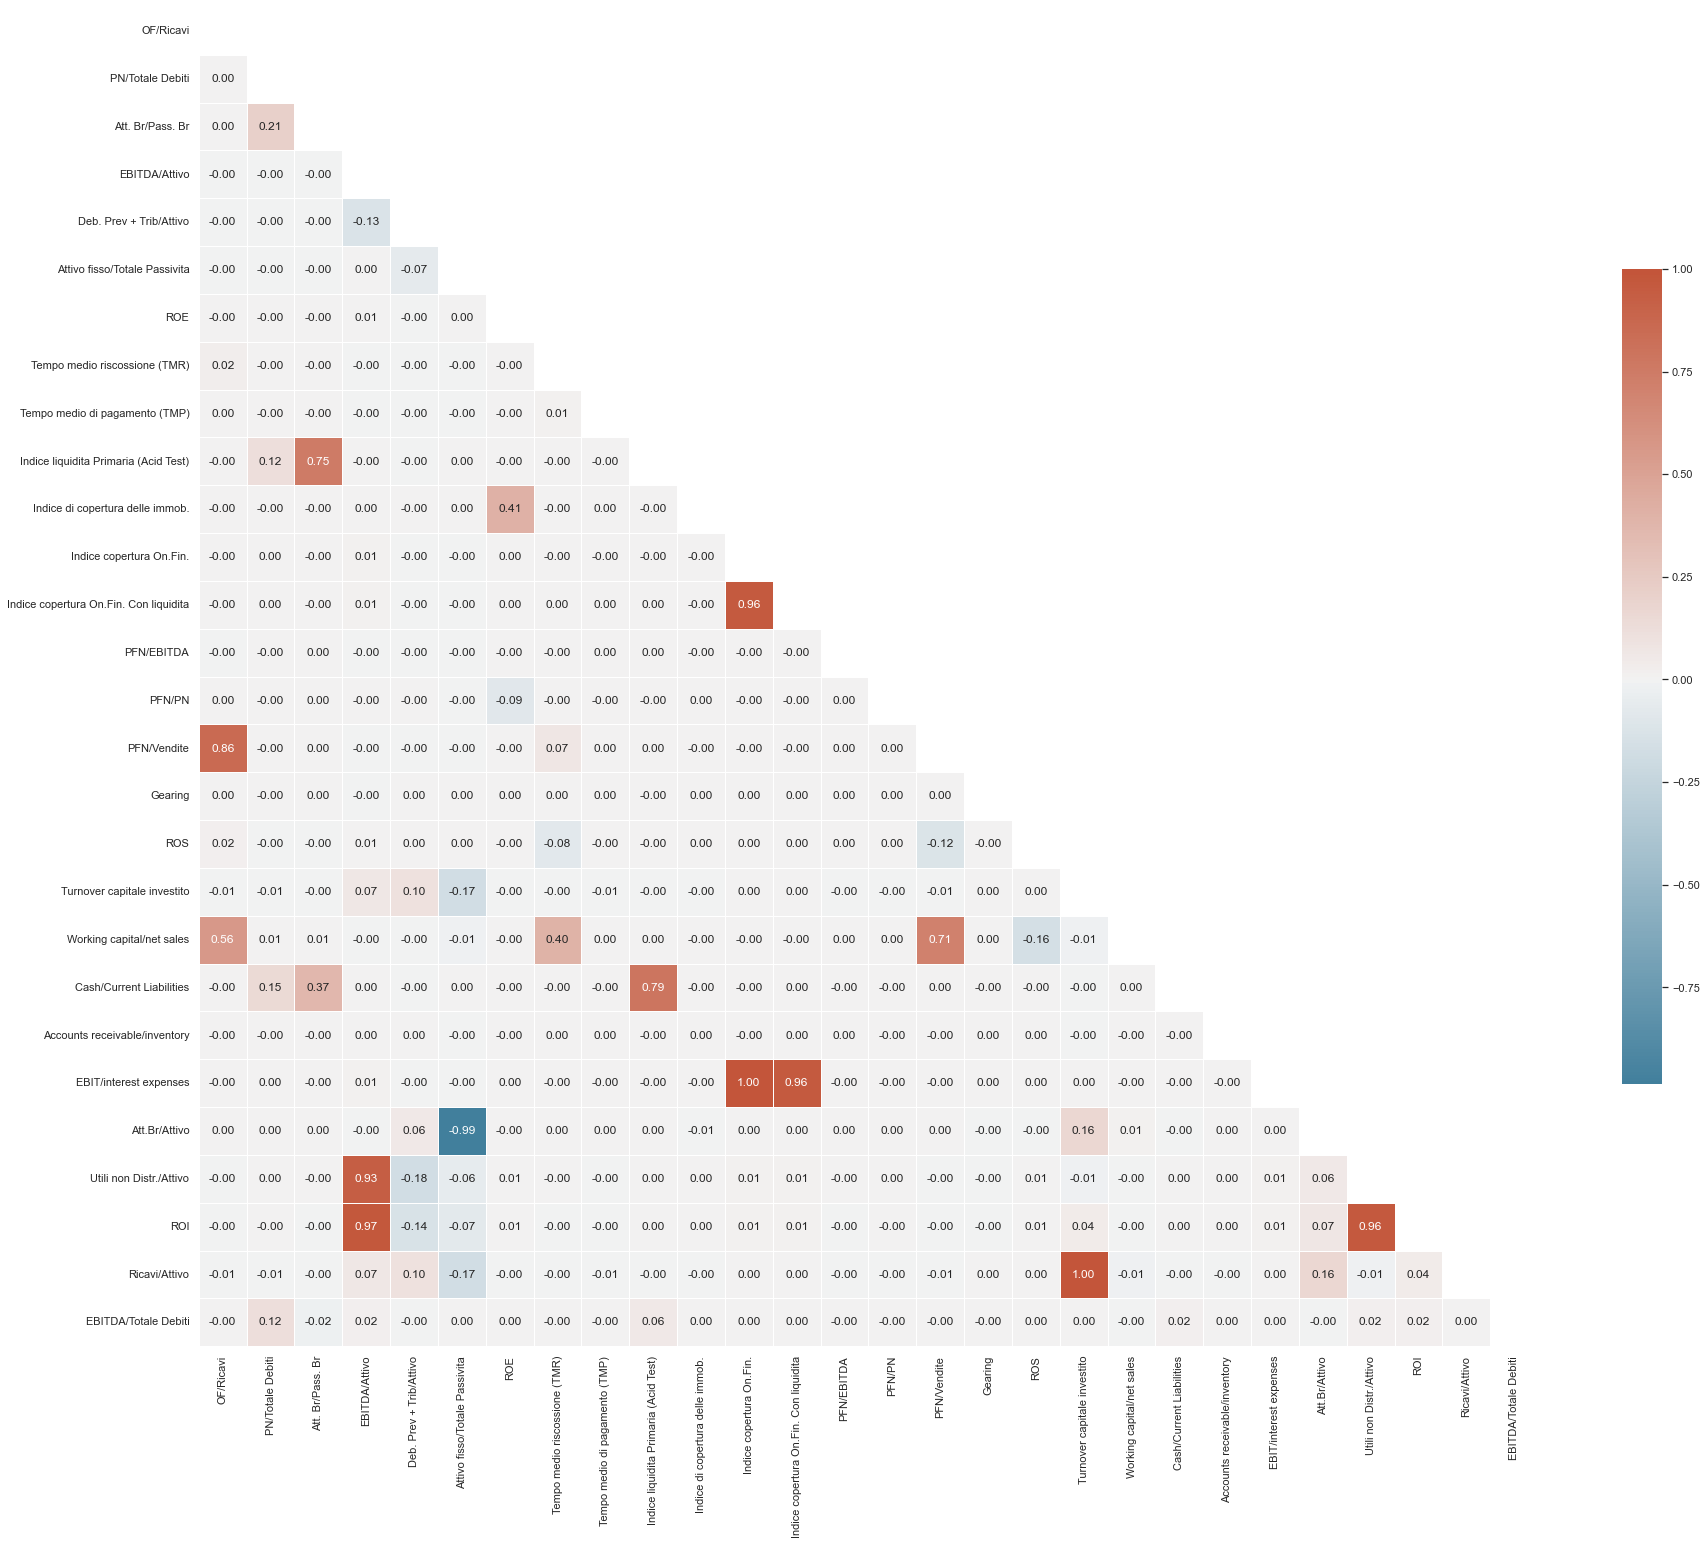

In [23]:
indexes_corr = filtered_dataset[allerta_indexes + letteratura_indexes + altman_indexes].corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(indexes_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(indexes_corr, mask=mask, cmap=cmap, vmax=1,
            center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Ci sono indici estremamente correlati fra di loro, rimuovo alcuni di essi

In [24]:
removed_indexes = [# Found from active
                   "EBITDA/Attivo",
                   "OF/Ricavi",
                   "Att. Br/Pass. Br",
                   "Attivo fisso/Totale Passivita",
                   "Indice liquidita Primaria (Acid Test)",
                   "Indice copertura On.Fin.",
                   "Indice copertura On.Fin. Con liquidita",
                   "PFN/Vendite",
                   "Turnover capitale investito",
                   "Utili non Distr./Attivo",
                   # Found from bankrupt
                   "ROE",
                   "ROI",
                   "Indice di copertura delle immob."]
filtered_dataset.drop(columns=removed_indexes, axis=1, inplace=True)

<AxesSubplot:>

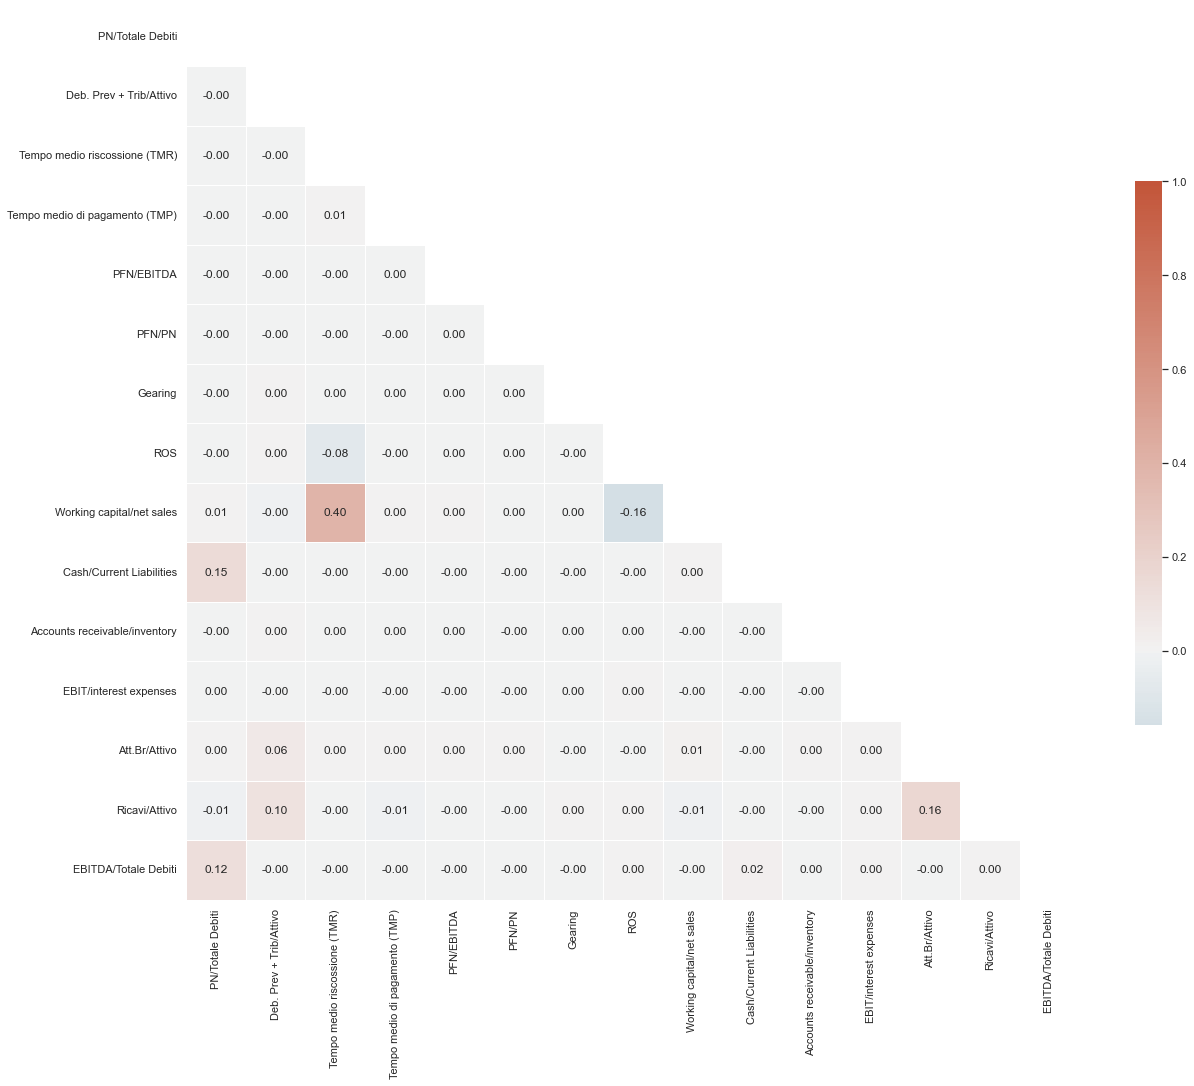

In [25]:
indexes = allerta_indexes + letteratura_indexes + altman_indexes

for index in removed_indexes:
    indexes.remove(index)

indexes_corr = filtered_dataset[indexes].corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(indexes_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(indexes_corr, mask=mask, cmap=cmap, vmax=1,
            center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
pd.set_option('display.float_format', lambda x: '%i' % x)
filtered_dataset[indexes].describe().T

,count,mean,std,min,25%,50%,75%,max
PN/Totale Debiti,591781,3,400,-21,0,0,0,156954
Deb. Prev + Trib/Attivo,591781,0,0,0,0,0,0,33
Tempo medio riscossione (TMR),591781,3460,894687,0,21,84,151,472421160
Tempo medio di pagamento (TMP),591781,878,107889,0,68,116,193,52709040
PFN/EBITDA,591781,13,2946,-641498,-1,0,4,1503519
PFN/PN,591781,13,9323,-388440,0,0,2,7132785
Gearing,591781,0,191,-117816,0,0,0,20686
ROS,591781,-2,1127,-775839,0,0,0,99800
Working capital/net sales,591781,277,25220,0,0,0,1,8012733
Cash/Current Liabilities,591781,1,335,0,0,0,0,181086


Esporto in csv e pickle

In [27]:
if to_export:
    filtered_dataset.to_csv(OUTPUT_PATH + "/indexes_active.csv")
    filtered_dataset.to_pickle(OUTPUT_PATH + "/indexes_active.pkl")